# Installing Libraries

In [1]:
!pip install tensorflow opencv-python kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00


# Importing Datasets

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.14GB/s]


**Extract the zip file**

In [4]:
!unzip fer2013.zip -d fer2013

Streaming output truncated to the last 5000 lines.
  inflating: fer2013/train/sad/Training_65242339.jpg  
  inflating: fer2013/train/sad/Training_65267116.jpg  
  inflating: fer2013/train/sad/Training_65275626.jpg  
  inflating: fer2013/train/sad/Training_6529266.jpg  
  inflating: fer2013/train/sad/Training_65329617.jpg  
  inflating: fer2013/train/sad/Training_65338712.jpg  
  inflating: fer2013/train/sad/Training_65338797.jpg  
  inflating: fer2013/train/sad/Training_65387162.jpg  
  inflating: fer2013/train/sad/Training_65404494.jpg  
  inflating: fer2013/train/sad/Training_65426218.jpg  
  inflating: fer2013/train/sad/Training_65430136.jpg  
  inflating: fer2013/train/sad/Training_65437377.jpg  
  inflating: fer2013/train/sad/Training_6545735.jpg  
  inflating: fer2013/train/sad/Training_65463385.jpg  
  inflating: fer2013/train/sad/Training_65473985.jpg  
  inflating: fer2013/train/sad/Training_65502829.jpg  
  inflating: fer2013/train/sad/Training_65505359.jpg  
  inflating: fer

# Importing Dependencies

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Locating the Path

In [6]:
train_path = '/content/fer2013/train'
test_path = '/content/fer2013/test'

**Image configuring**

In [7]:
img_height = 48
img_width = 48
batch_size = 64

In [8]:
train_gen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range=30,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)

In [9]:
test_gen = ImageDataGenerator(rescale=1./255)

In [10]:
train_data = train_gen.flow_from_directory(
  train_path,
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode='categorical',
  shuffle=True,
  color_mode='grayscale'
)

Found 28709 images belonging to 7 classes.


In [11]:
test_data = test_gen.flow_from_directory(
  test_path,
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode='categorical',
  shuffle=True,
  color_mode='grayscale'
)


Found 7178 images belonging to 7 classes.


# Model : CNN

In [12]:

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compiling Model**

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

*Summary of model*

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,775 (3.42 MB)

 Trainable params: 895,879 (3.42 MB)

 Non-trainable params: 896 (3.50 KB)

***Train the model***

IMPORTANT : Increase the epochs for better accuracy.

In [16]:
epochs = 15
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs
)

Epoch 1/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 418s 931ms/step - accuracy: 0.2799 - loss: 1.7503 - val_accuracy: 0.3434 - val_loss: 1.6192
Epoch 2/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 416s 926ms/step - accuracy: 0.3141 - loss: 1.6696 - val_accuracy: 0.4044 - val_loss: 1.5245
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 416s 925ms/step - accuracy: 0.3356 - loss: 1.6244 - val_accuracy: 0.3984 - val_loss: 1.5296
Epoch 4/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 422s 940ms/step - accuracy: 0.3548 - loss: 1.5910 - val_accuracy: 0.2262 - val_loss: 1.7594
Epoch 5/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 421s 938ms/step - accuracy: 0.3659 - loss: 1.5694 - val_accuracy: 0.4355 - val_loss: 1.4377
Epoch 6/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 419s 934ms/step - accuracy: 0.3777 - loss: 1.5379 - val_accuracy: 0.4207 - val_loss: 1.4900
Epoch 7/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 422s 940ms/step - accuracy: 0.3895 - loss: 1.5153 - val_accuracy: 0.4706 - val_loss: 1.3652
Epoch 8/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 425s 946ms/step - accuracy: 0.4022 -

# Evaluating the model Accuracy

In [17]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.5060 - loss: 1.2939
Test Accuracy: 50.67%
Test Loss: 1.2940


# **Plot the model**

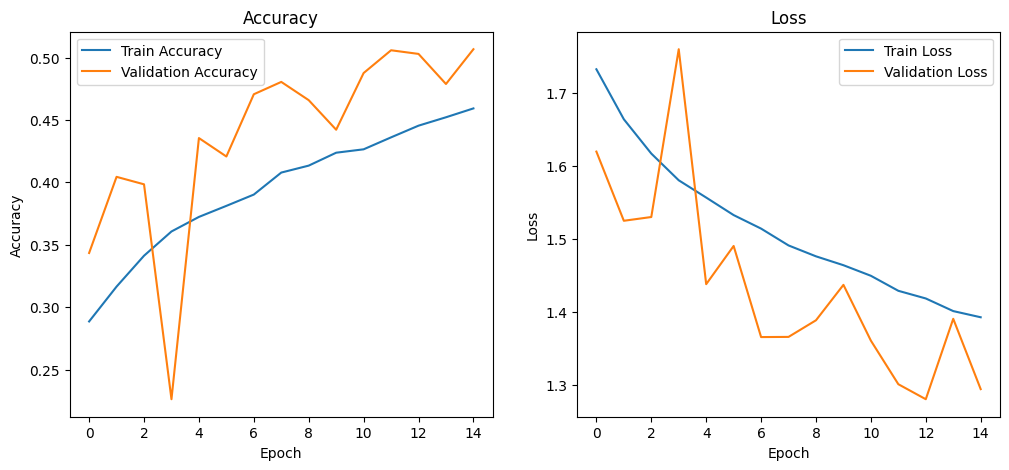

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **Confusion Matrix of model**

113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step


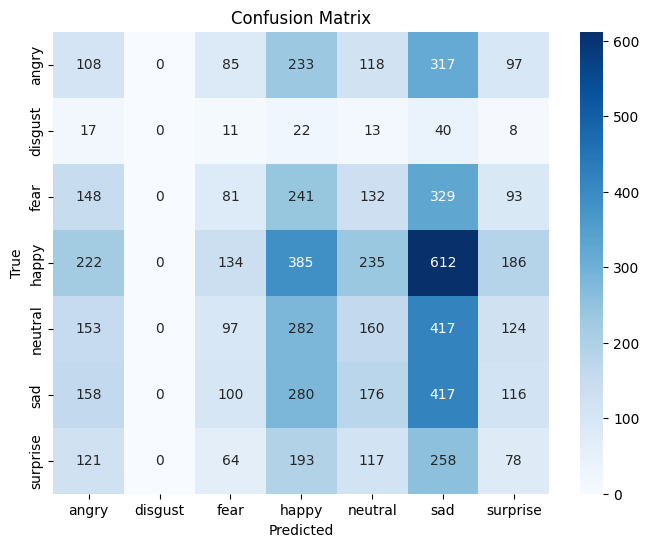

              precision    recall  f1-score   support

       angry       0.12      0.11      0.11       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.08      0.10      1024
       happy       0.24      0.22      0.23      1774
     neutral       0.17      0.13      0.15      1233
         sad       0.17      0.33      0.23      1247
    surprise       0.11      0.09      0.10       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.13      7178
weighted avg       0.17      0.17      0.16      7178



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred)
labels = list(test_data.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=labels))


# **Testing the model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


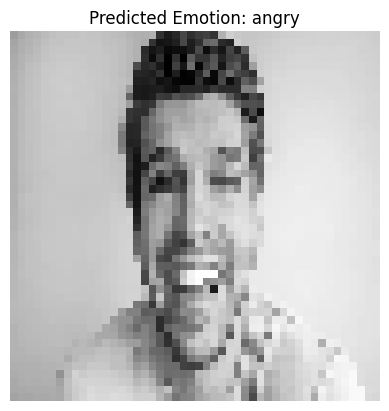

Predicted Emotion: angry


In [23]:
from PIL import Image
import os

class_labels = {v: k for k, v in train_data.class_indices.items()}

def predict_emotion(img_path):
    if not os.path.exists(img_path):
        return f"Error: Image file not found at {img_path}"

    if img_path.lower().endswith('.avif'):
        try:
            img_pil = Image.open(img_path)
            temp_img_path = img_path.replace('.avif', '.png').replace('.AVIF', '.png')
            img_pil.save(temp_img_path, format='PNG')
            img_path = temp_img_path
        except Exception as e:
            return f"Error converting AVIF to PNG: {e}"

    try:
        img = image.load_img(img_path, target_size=(48,48), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        emotion = class_labels[predicted_class]

        if 'temp_img_path' in locals() and os.path.exists(temp_img_path):
            os.remove(temp_img_path)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted Emotion: {emotion}")
        plt.axis('off')
        plt.show()
        return emotion
    except Exception as e:
        if 'temp_img_path' in locals() and os.path.exists(temp_img_path):
            os.remove(temp_img_path)
        return f"Error loading or processing image: {e}"



image_path = '/content/depositphotos_374111884-stock-photo-cute-happy-face-close-face.jpg'
print(f"Predicted Emotion: {predict_emotion(image_path)}")